In [11]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
from matplotlib import pyplot as plt

In [5]:
import random
import numpy as np
import torch

# DQN

In [8]:
import gymnasium as gym
from utils.replay_buffer import ReplayBuffer
from policies.dqn import DQN
from torch import nn

env = gym.make("CartPole-v1", max_episode_steps=200)

module = nn.Sequential(
    nn.Linear(4, 128), nn.ReLU(inplace=True),
    nn.Linear(128, 2)
)
policy = DQN(
    nn_module=module,
    state_dim=4,
    action_dim=2,
    lr=2e-3,
    eps=0.01,
    gamma=0.98,
)

results = []

In [5]:
buffer_size = 10000
minimal_size = 500
batch_size = 64

In [6]:
random.seed(0)
np.random.seed(0)
torch.manual_seed(0)

In [7]:
buffer = ReplayBuffer(capacity=buffer_size)

for epi in range(500):
    observation, info = env.reset(seed=0)
    terminated = False
    truncated = False
    epi_len = 0
    total_return = 0

    while not terminated and not truncated:
        action = policy(observation)
        prev_obs = observation
        observation, reward, terminated, truncated, info = env.step(action)
        buffer.add(prev_obs, action, reward, observation, terminated, truncated)
        epi_len += 1
        total_return += reward

        if buffer.size() > minimal_size:
            sampled = buffer.sample(batch_size)
            policy.update(sampled)
    
    print("epi: {}; len: {}; return: {}".format(epi, epi_len, total_return))
    results.append((epi_len, total_return))
env.close()


epi: 0; len: 11; return: 11.0
epi: 1; len: 11; return: 11.0
epi: 2; len: 11; return: 11.0
epi: 3; len: 11; return: 11.0
epi: 4; len: 11; return: 11.0
epi: 5; len: 11; return: 11.0
epi: 6; len: 11; return: 11.0
epi: 7; len: 11; return: 11.0
epi: 8; len: 11; return: 11.0
epi: 9; len: 8; return: 8.0
epi: 10; len: 11; return: 11.0
epi: 11; len: 11; return: 11.0
epi: 12; len: 11; return: 11.0
epi: 13; len: 11; return: 11.0
epi: 14; len: 11; return: 11.0
epi: 15; len: 11; return: 11.0
epi: 16; len: 11; return: 11.0
epi: 17; len: 11; return: 11.0
epi: 18; len: 11; return: 11.0
epi: 19; len: 11; return: 11.0
epi: 20; len: 11; return: 11.0
epi: 21; len: 11; return: 11.0
epi: 22; len: 11; return: 11.0
epi: 23; len: 11; return: 11.0
epi: 24; len: 11; return: 11.0
epi: 25; len: 11; return: 11.0
epi: 26; len: 11; return: 11.0
epi: 27; len: 11; return: 11.0
epi: 28; len: 11; return: 11.0
epi: 29; len: 11; return: 11.0
epi: 30; len: 11; return: 11.0
epi: 31; len: 11; return: 11.0
epi: 32; len: 11; re

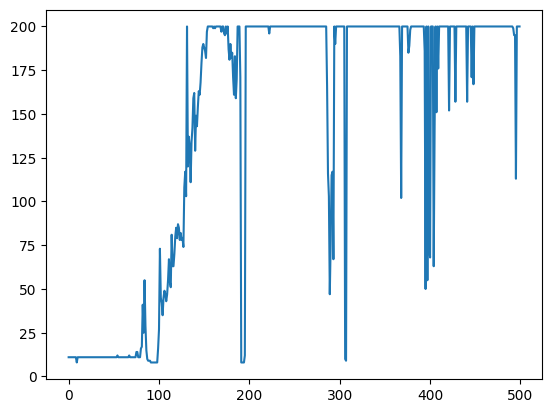

In [8]:
plt.plot([p[0] for p in results])

In [9]:
len(results)

500

# REINFORCE

In [95]:
from policies.reinforce import REINFORCE
env = gym.make("CartPole-v1", max_episode_steps=200)
env.reset(seed=0)

(array([ 0.01369617, -0.02302133, -0.04590265, -0.04834723], dtype=float32),
 {})

In [96]:
actor_module = nn.Sequential(
    nn.Linear(4, 128), nn.ReLU(inplace=True),
    nn.Linear(128, 2), nn.Softmax()
)
r_policy = REINFORCE(
    module=actor_module,
    gamma=0.98
)
results_r = []

In [97]:
for epi in range(500):
    observation, info = env.reset(seed=0)
    terminated = False
    truncated = False
    epi_len = 0
    total_return = 0

    states, rewards, actions = [], [], []
    while not terminated and not truncated:
        action = r_policy(observation)
        prev_obs = observation
        observation, reward, terminated, truncated, info = env.step(action)

        states.append(prev_obs)
        rewards.append(reward)
        actions.append(action)
        
        epi_len += 1
        total_return += reward

    r_policy.update((states, rewards, actions))
    
    print("epi: {}; len: {}; return: {}".format(epi, epi_len, total_return))
    results_r.append((epi_len, total_return))
env.close()


/Users/yichen/Documents/SchoolWk/research/rl-learn/env/lib/python3.11/site-packages/torch/nn/modules/container.py:217: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


epi: 0; len: 32; return: 32.0
epi: 1; len: 15; return: 15.0
epi: 2; len: 15; return: 15.0
epi: 3; len: 11; return: 11.0
epi: 4; len: 14; return: 14.0
epi: 5; len: 18; return: 18.0
epi: 6; len: 21; return: 21.0
epi: 7; len: 18; return: 18.0
epi: 8; len: 26; return: 26.0
epi: 9; len: 16; return: 16.0
epi: 10; len: 38; return: 38.0
epi: 11; len: 28; return: 28.0
epi: 12; len: 17; return: 17.0
epi: 13; len: 13; return: 13.0
epi: 14; len: 18; return: 18.0
epi: 15; len: 12; return: 12.0
epi: 16; len: 16; return: 16.0
epi: 17; len: 68; return: 68.0
epi: 18; len: 15; return: 15.0
epi: 19; len: 17; return: 17.0
epi: 20; len: 13; return: 13.0
epi: 21; len: 27; return: 27.0
epi: 22; len: 26; return: 26.0
epi: 23; len: 26; return: 26.0
epi: 24; len: 29; return: 29.0
epi: 25; len: 28; return: 28.0
epi: 26; len: 29; return: 29.0
epi: 27; len: 22; return: 22.0
epi: 28; len: 44; return: 44.0
epi: 29; len: 12; return: 12.0
epi: 30; len: 21; return: 21.0
epi: 31; len: 18; return: 18.0
epi: 32; len: 29; 

Text(0, 0.5, 'Episodes')

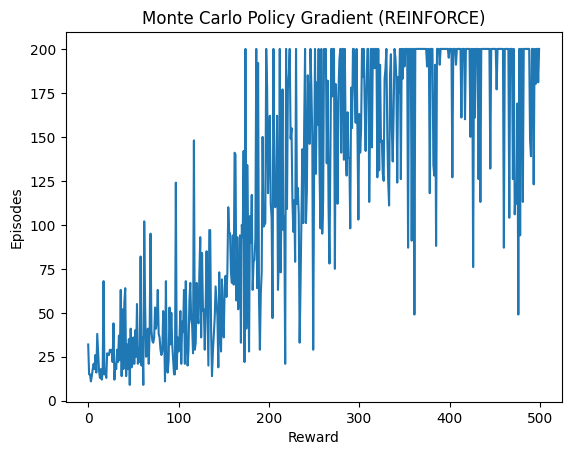

In [98]:
plt.plot([p[0] for p in results_r])
plt.title("Monte Carlo Policy Gradient (REINFORCE)")
plt.xlabel("Reward")
plt.ylabel("Episodes")

# Actor Critic (TD-1)

In [109]:
from policies.actor_critic import ActorCritic
env = gym.make("CartPole-v1", max_episode_steps=200)
env.reset(seed=0)

(array([ 0.01369617, -0.02302133, -0.04590265, -0.04834723], dtype=float32),
 {})

In [110]:
actor_module = nn.Sequential(
    nn.Linear(4, 128), nn.ReLU(inplace=True),
    nn.Linear(128, 2), nn.Softmax()
)
critic_module = nn.Sequential(
    nn.Linear(4, 128), nn.ReLU(inplace=True),
    nn.Linear(128, 1)
)
ac1_policy = ActorCritic(
    actor_module=actor_module,
    critic_module=critic_module,
)
results_ac1 = []

In [111]:
for epi in range(500):
    observation, info = env.reset(seed=0)
    terminated = False
    truncated = False
    epi_len = 0
    total_return = 0

    while not terminated and not truncated:
        action = ac1_policy(observation)
        prev_obs = observation
        observation, reward, terminated, truncated, info = env.step(action)

        ac1_policy.update({
            "state": prev_obs,
            "next_state": observation,
            "reward": reward,
            "terminated": terminated,
            "action": action
        })
        epi_len += 1
        total_return += reward
    
    print("epi: {}; len: {}; return: {}".format(epi, epi_len, total_return))
    results_ac1.append((epi_len, total_return))
env.close()


epi: 0; len: 16; return: 16.0
epi: 1; len: 13; return: 13.0
epi: 2; len: 28; return: 28.0
epi: 3; len: 25; return: 25.0
epi: 4; len: 16; return: 16.0
epi: 5; len: 14; return: 14.0
epi: 6; len: 11; return: 11.0
epi: 7; len: 13; return: 13.0
epi: 8; len: 13; return: 13.0
epi: 9; len: 22; return: 22.0
epi: 10; len: 12; return: 12.0
epi: 11; len: 13; return: 13.0
epi: 12; len: 11; return: 11.0
epi: 13; len: 11; return: 11.0
epi: 14; len: 11; return: 11.0
epi: 15; len: 11; return: 11.0
epi: 16; len: 11; return: 11.0
epi: 17; len: 13; return: 13.0
epi: 18; len: 11; return: 11.0
epi: 19; len: 11; return: 11.0
epi: 20; len: 12; return: 12.0
epi: 21; len: 13; return: 13.0
epi: 22; len: 11; return: 11.0
epi: 23; len: 12; return: 12.0
epi: 24; len: 13; return: 13.0
epi: 25; len: 12; return: 12.0
epi: 26; len: 11; return: 11.0
epi: 27; len: 11; return: 11.0
epi: 28; len: 11; return: 11.0
epi: 29; len: 16; return: 16.0
epi: 30; len: 11; return: 11.0
epi: 31; len: 11; return: 11.0
epi: 32; len: 11; 

Text(0, 0.5, 'Episodes')

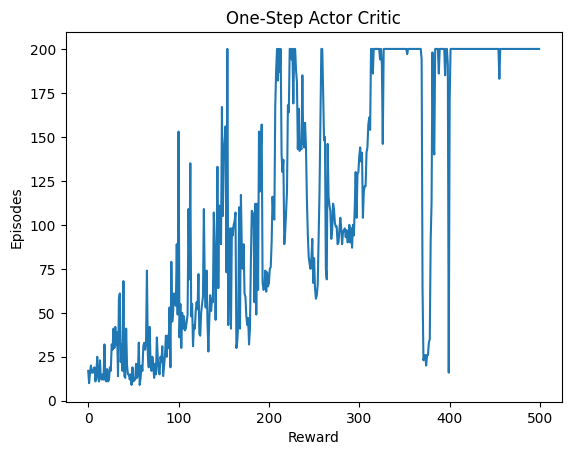

In [102]:
plt.plot([p[0] for p in results_ac1])
plt.title("One-Step Actor Critic")
plt.xlabel("Reward")
plt.ylabel("Episodes")

# Actor Critic (Eligibility Trace)

In [155]:
from policies.actor_critic_eligibility_trace import ActorCriticEligibilityTrace
env = gym.make("CartPole-v1", max_episode_steps=200)
env.reset(seed=0)

(array([ 0.01369617, -0.02302133, -0.04590265, -0.04834723], dtype=float32),
 {})

In [156]:
actor_module = nn.Sequential(
    nn.Linear(4, 128), nn.ReLU(inplace=True),
    nn.Linear(128, 2), nn.Softmax()
)
critic_module = nn.Sequential(
    nn.Linear(4, 128), nn.ReLU(inplace=True),
    nn.Linear(128, 1)
)
ac2_policy = ActorCriticEligibilityTrace(
    actor_module=actor_module,
    critic_module=critic_module,
    lambda_actor=0,
    lambda_critic=0
)
results_ac2 = []

In [157]:
for epi in range(500):
    observation, info = env.reset(seed=0)
    terminated = False
    truncated = False
    epi_len = 0
    total_return = 0

    while not terminated and not truncated:
        action = ac1_policy(observation)
        prev_obs = observation
        observation, reward, terminated, truncated, info = env.step(action)

        ac2_policy.update({
            "state": prev_obs,
            "next_state": observation,
            "reward": reward,
            "terminated": terminated,
            "action": action
        })
        epi_len += 1
        total_return += reward
    
    print("epi: {}; len: {}; return: {}".format(epi, epi_len, total_return))
    results_ac2.append((epi_len, total_return))
env.close()


epi: 0; len: 42; return: 42.0
epi: 1; len: 13; return: 13.0
epi: 2; len: 31; return: 31.0
epi: 3; len: 8; return: 8.0
epi: 4; len: 18; return: 18.0
epi: 5; len: 12; return: 12.0
epi: 6; len: 28; return: 28.0
epi: 7; len: 13; return: 13.0
epi: 8; len: 23; return: 23.0
epi: 9; len: 11; return: 11.0
epi: 10; len: 29; return: 29.0
epi: 11; len: 22; return: 22.0
epi: 12; len: 8; return: 8.0
epi: 13; len: 11; return: 11.0
epi: 14; len: 8; return: 8.0
epi: 15; len: 18; return: 18.0
epi: 16; len: 43; return: 43.0
epi: 17; len: 10; return: 10.0
epi: 18; len: 11; return: 11.0
epi: 19; len: 46; return: 46.0
epi: 20; len: 16; return: 16.0
epi: 21; len: 17; return: 17.0
epi: 22; len: 10; return: 10.0
epi: 23; len: 33; return: 33.0
epi: 24; len: 12; return: 12.0
epi: 25; len: 9; return: 9.0
epi: 26; len: 8; return: 8.0
epi: 27; len: 9; return: 9.0
epi: 28; len: 20; return: 20.0
epi: 29; len: 11; return: 11.0
epi: 30; len: 30; return: 30.0
epi: 31; len: 15; return: 15.0
epi: 32; len: 11; return: 11.0

Text(0, 0.5, 'Episodes')

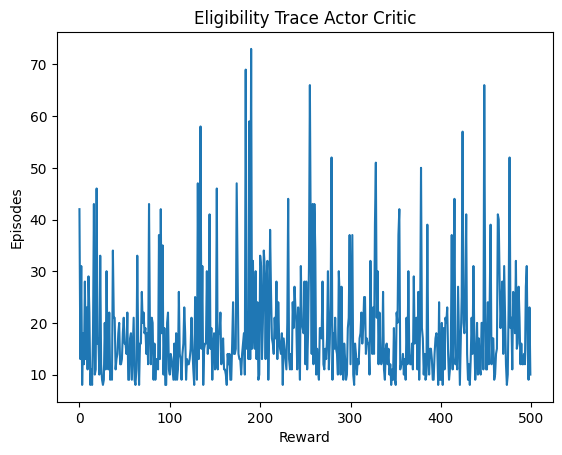

In [158]:
plt.plot([p[0] for p in results_ac2])
plt.title("Eligibility Trace Actor Critic")
plt.xlabel("Reward")
plt.ylabel("Episodes")